In [7]:
import cmocean
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

datadir = "../data/"
figdir = "../figures/"

In [8]:
ds_ease = xr.open_dataset(datadir + "ds_aviso.nc")
ds_ease

<xarray.Dataset> Size: 2GB
Dimensions:  (y: 264, x: 264, time: 1338)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2011-01-03 2011-01-06 ... 2021-12-30
    lat      (y, x) float32 279kB ...
    lon      (y, x) float32 279kB ...
Dimensions without coordinates: y, x
Data variables:
    sla      (y, x, time) float32 373MB ...
    adt      (y, x, time) float32 373MB ...
    ugos     (y, x, time) float32 373MB ...
    vgos     (y, x, time) float32 373MB ...
    ugosa    (y, x, time) float32 373MB ...
    vgosa    (y, x, time) float32 373MB ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2011-01-03 00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2011-01-03 00:00:00Z
    title:                           DT merged all satellites Arctic Ocean Gr...

In [9]:
dataname = "hydrography_woa"
ds_latlon = xr.open_dataset(datadir + f"{dataname}.nc")
ds_latlon

<xarray.Dataset> Size: 494MB
Dimensions:  (lat: 120, lon: 1440, depth: 102)
Coordinates:
  * lat      (lat) float32 480B 60.12 60.38 60.62 60.88 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Data variables:
    ct       (depth, lat, lon) float64 141MB ...
    sa       (depth, lat, lon) float32 71MB ...
    t_dd     (depth, lat, lon) float64 141MB ...
    s_dd     (depth, lat, lon) float64 141MB ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [10]:
ds_xy = ds_latlon.interp(lat=ds_ease.lat, lon=ds_ease.lon)
ds_xy

<xarray.Dataset> Size: 228MB
Dimensions:  (depth: 102, y: 264, x: 264)
Coordinates:
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
Dimensions without coordinates: y, x
Data variables:
    ct       (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    sa       (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    t_dd     (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    s_dd     (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [11]:
ds_xy.coords["x"] = np.arange(len(ds_xy.x))
ds_xy.coords["y"] = np.arange(len(ds_xy.y))
ds_xy

<xarray.Dataset> Size: 228MB
Dimensions:  (depth: 102, y: 264, x: 264)
Coordinates:
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
  * x        (x) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
  * y        (y) int64 2kB 0 1 2 3 4 5 6 7 8 ... 256 257 258 259 260 261 262 263
Data variables:
    ct       (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    sa       (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    t_dd     (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
    s_dd     (depth, y, x) float64 57MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

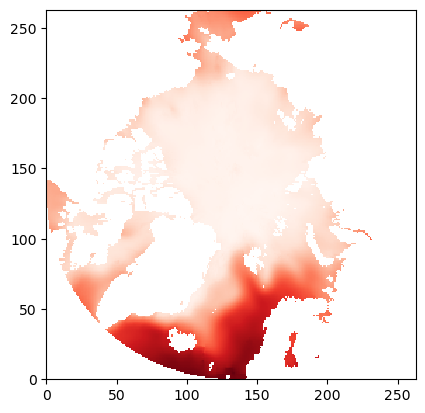

In [13]:
fig, ax = plt.subplots()
cm = ax.pcolormesh(ds_xy.x, ds_xy.y, ds_xy.ct.isel(depth=0, x=slice(0, -1), y=slice(0, -1)), cmap="Reds")
ax.set_aspect("equal")

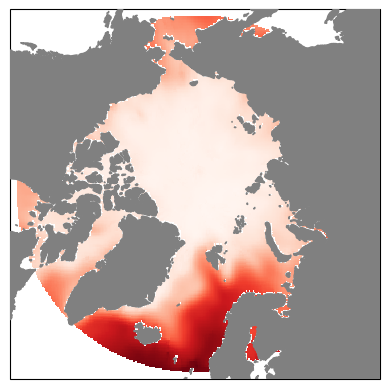

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection" : ccrs.Stereographic(central_latitude=90)})

c = ax.pcolormesh(ds_xy.lon, ds_xy.lat, ds_xy.ct.isel(depth=0, x=slice(0, -1), y=slice(0, -1)),
                  cmap="Reds",
                  transform=ccrs.PlateCarree()
                  )
ax.add_feature(cfeature.LAND, color="grey", zorder=100)
ax.set_aspect("equal")

In [15]:
ds_xy.to_netcdf(datadir + dataname + "_ease.nc")